In [1]:
import os
import pandas as pd

current_dir = os.getcwd()
path_file = os.path.join(current_dir, "datasets/seeds_dataset.txt")
# Change tabulation separator to comma
df = pd.read_table(path_file, header=None, names = [
    'Area', 'Perimeter', 'Compactness', 'Length_of_kernel', 'Width_of_kernel',
    'Asymmetry_coefficient', 'Length_of_kernel_groove', 'Class'
])

df.head()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length_of_kernel         210 non-null    float64
 4   Width_of_kernel          210 non-null    float64
 5   Asymmetry_coefficient    210 non-null    float64
 6   Length_of_kernel_groove  210 non-null    float64
 7   Class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [3]:
df = df[['Area', 'Length_of_kernel', 'Compactness']]
df.head()

,Area,Length_of_kernel,Compactness
0,15.26,5.763,0.8710
1,14.88,5.554,0.8811
2,14.29,5.291,0.9050
3,13.84,5.324,0.8955
4,16.14,5.658,0.9034


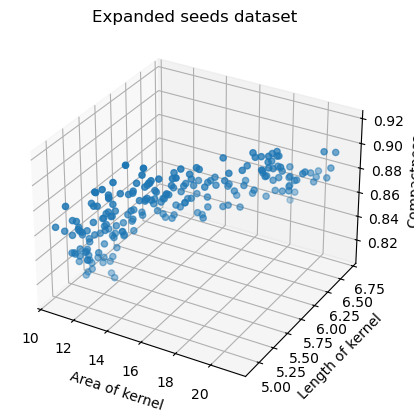

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['Area'], df['Length_of_kernel'], df['Compactness'])
ax.set_xlabel('Area of kernel')
ax.set_ylabel('Length of kernel')
ax.set_zlabel('Compactness')
plt.title('Expanded seeds dataset')
plt.show()

In [5]:
from sklearn.decomposition import PCA

model = PCA()
model.fit(df.values)

PCA()

In [6]:
model.explained_variance_ratio_

array([9.97794495e-01, 2.19418709e-03, 1.13183333e-05])

In [7]:
model = PCA(n_components=1)
model.fit(df.values)

PCA(n_components=1)

In [8]:
model.explained_variance_ratio_

array([0.99779449])

In [9]:
model.components_

array([[0.98964224, 0.14347367, 0.00485241]])

In [10]:
data_transformed = model.fit_transform(df.values)

In [11]:
data_restored = model.inverse_transform(data_transformed)

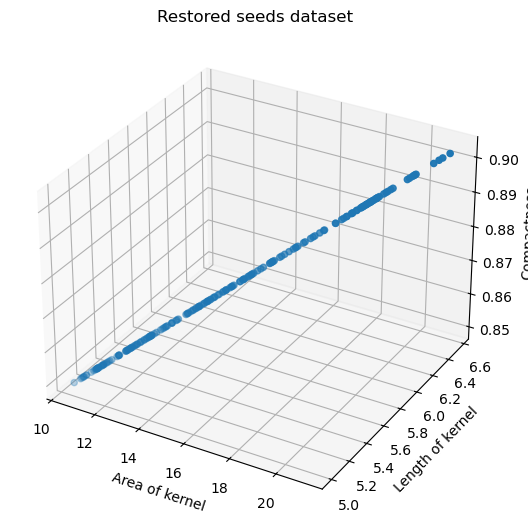

In [12]:
fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(data_restored[:, 0], data_restored[:, 1], data_restored[:, 2])
ax.set_xlabel('Area of kernel')
ax.set_ylabel('Length of kernel')
ax.set_zlabel('Compactness')
plt.title('Restored seeds dataset')
plt.show()